In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

#### Загружаем очищенные данные

In [2]:
data19=pd.read_csv('df2019_model.csv',index_col=0)
data20=pd.read_csv('df2020_model.csv',index_col=0)
data21=pd.read_csv('df2021_model.csv',index_col=0)

data19.head(1)

,ID,cf_likv1,cf_likv2,cf_likv3,cf_ob1,cf_ob2,cf_ob3,cf_ob4,cf_ob5,cf_rent1,cf_rent2,cf_rent3,сf_rent4,сf_rent5,сf_rent6,cf_rent7,cf_ru1,cf_ru2,cf_ru3,cf_ru4,cf_ru5,cf_ru6,cf_ru7,cf_ru8,cf_fu1,cf_fu2,cf_fu3,cf_fu4,cf_fu5,cf_fu6,ПДЗ,target
0,0,1.020214,0.975787,0.531527,6.094585,10.657441,6.762855,16.179594,0.713523,0.023532,0.021702,0.087606,0.325947,0.347832,1.901627,0.122779,0.052601,2.720623,0.019814,5.834154,0.634566,0.956453,0.111153,0.105925,0.268772,0.268772,0.171404,0.046069,-0.024814,0.019814,0,0


### Определим, есть ли дубликаты или пропуски в данных

Количество дубликатов в данных 
 за 2019 год: 0 
 за 2020 год: 0 
 за 2021 год: 0


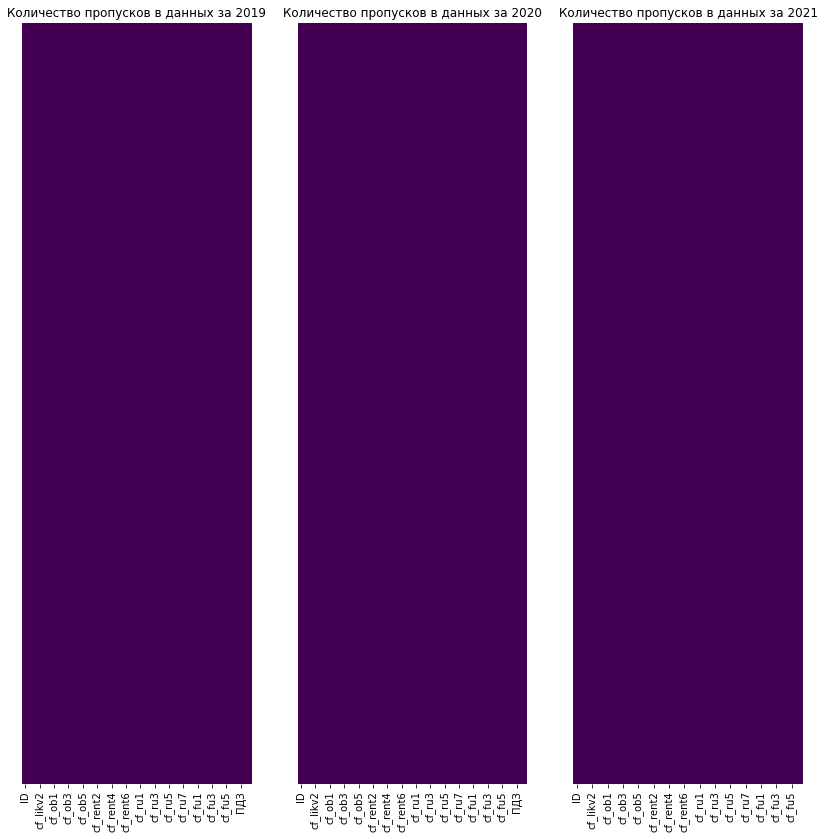

In [4]:
#define plotting region (1 row, 3 columns)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(14,14) 
sns.heatmap(data19.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=axes[0]).set(title='Количество пропусков в данных за 2019')
sns.heatmap(data20.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=axes[1]).set(title='Количество пропусков в данных за 2020')
sns.heatmap(data21.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=axes[2]).set(title='Количество пропусков в данных за 2021')

print(f'Количество дубликатов в данных \n за 2019 год: {data19.duplicated().sum()} \n за 2020 год: {data20.duplicated().sum()} \n за 2021 год: {data21.duplicated().sum()}')


### Построим корреляционые матрицы для входящих факторов каждого года

[Text(0.5, 1.0, 'Корреляции переменных')]

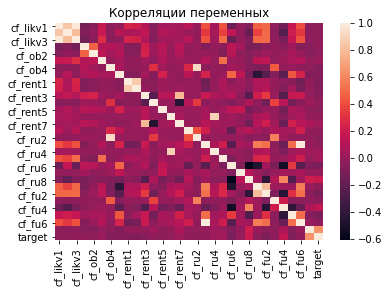

In [5]:
sns.heatmap(data19[data19.columns[1:]].corr()).set(title='Корреляции переменных')

**Целевая переменная (target) слабо коррелирует c признаками за исключением коэффициента обеспеченности собственными источниками финансирования (сf_fu6),с которым есть некая положительная линейная связь**

### Построим диаграммы рассеивания для определения зависимости ПДЗ от признаков

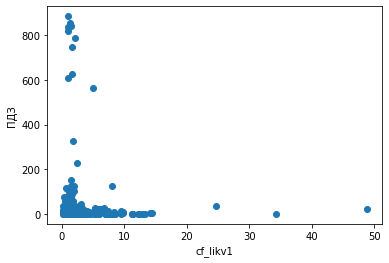

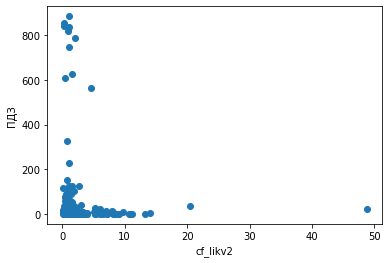

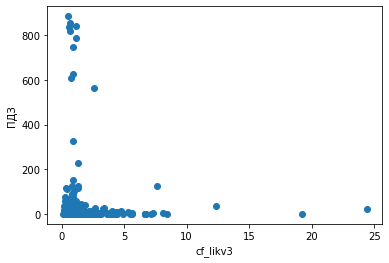

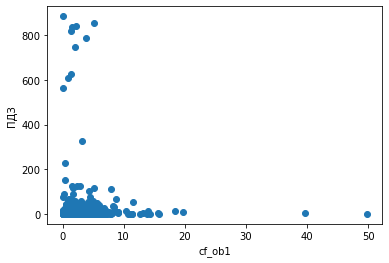

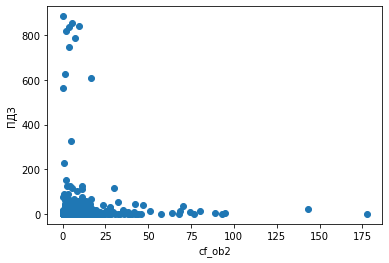

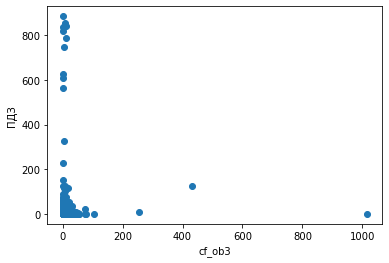

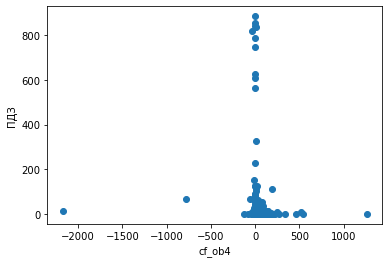

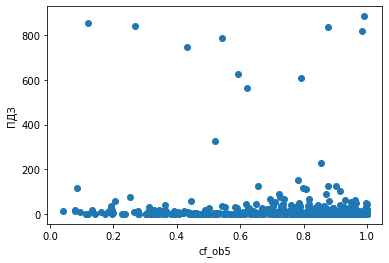

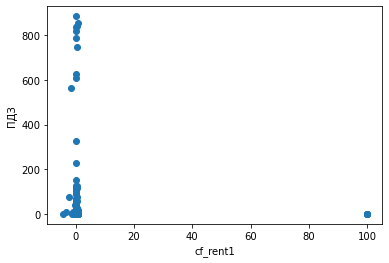

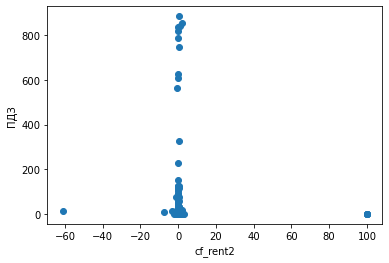

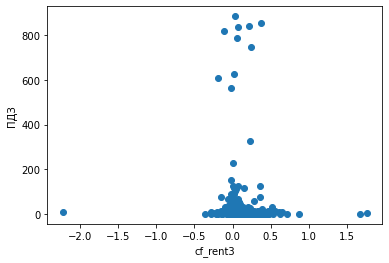

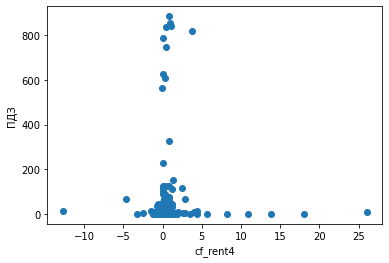

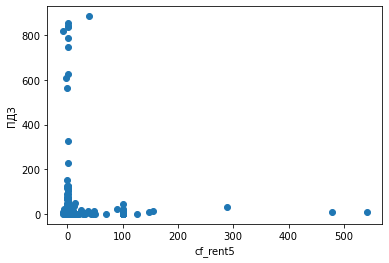

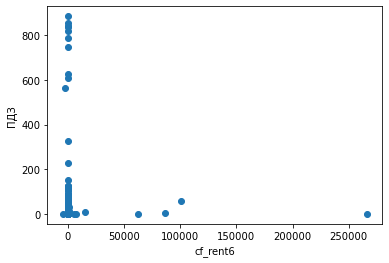

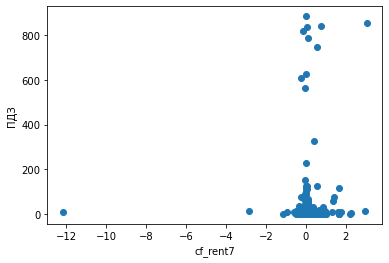

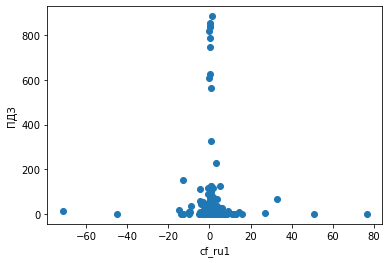

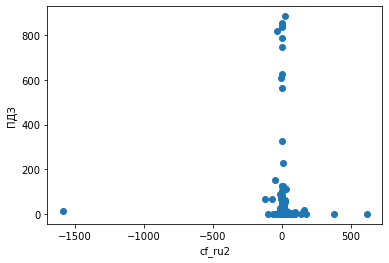

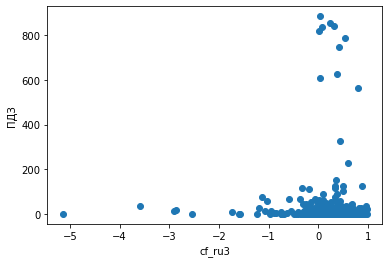

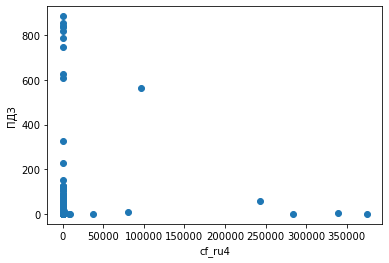

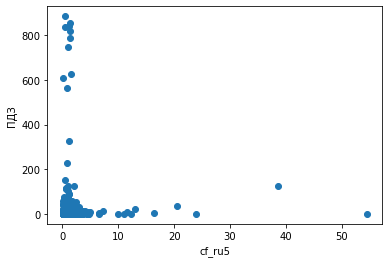

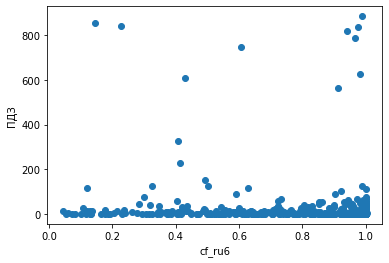

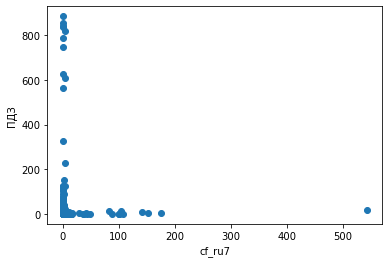

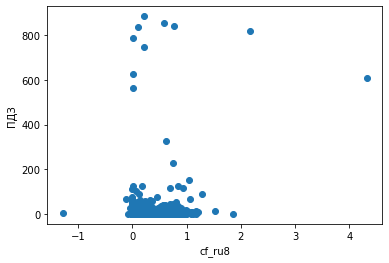

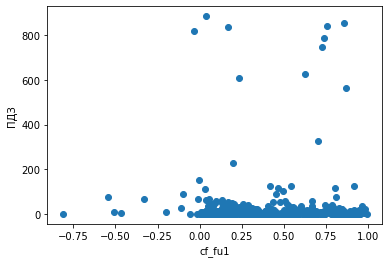

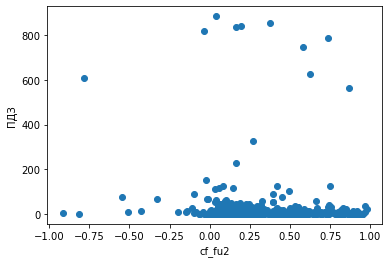

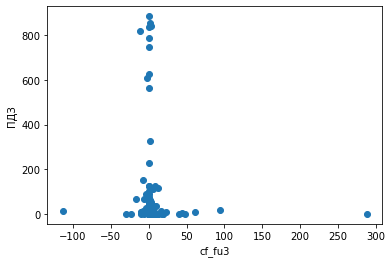

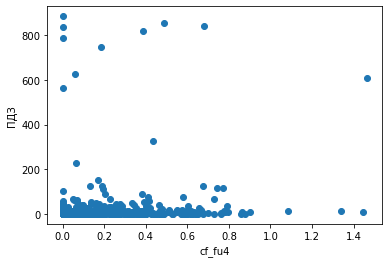

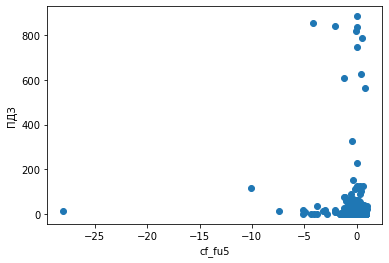

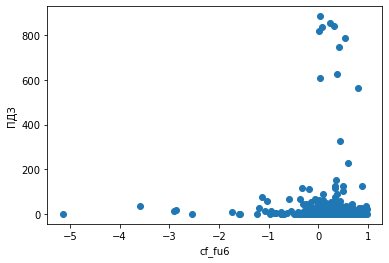

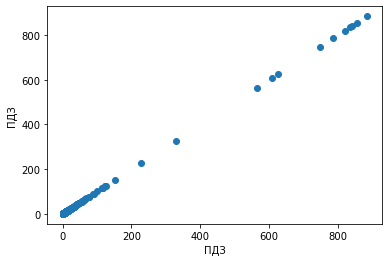

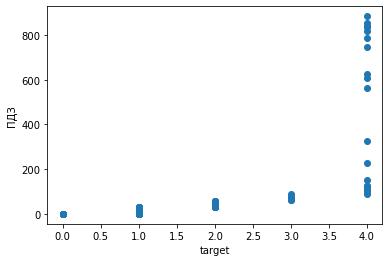

In [6]:
for i in data19.columns[1:]:
    plt.scatter(x = data19[i],y = data19['ПДЗ'])
    plt.xlabel(i)
    plt.ylabel('ПДЗ')
    plt.show()

**На данных графиках никакой зависимости между ПДЗ и признаками не прослеживается**

### Построим диаграммы рассеивания для определения зависимости целевой переменной (target) от признаков

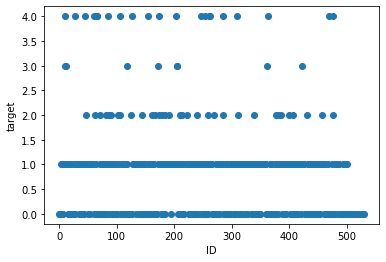

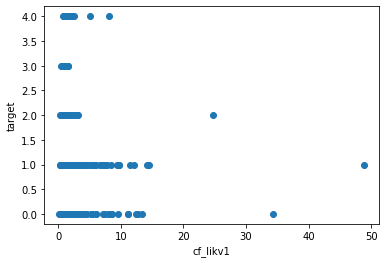

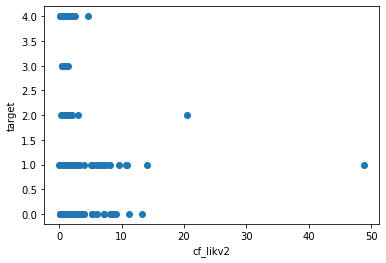

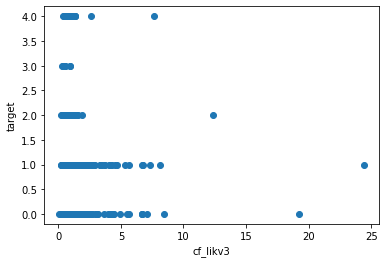

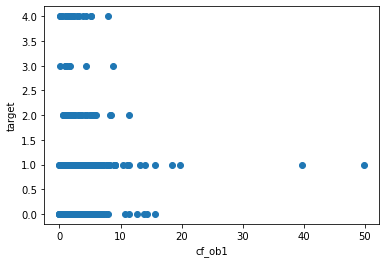

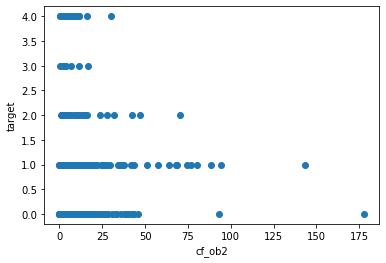

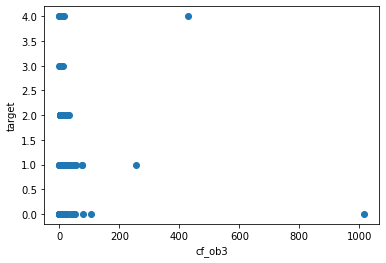

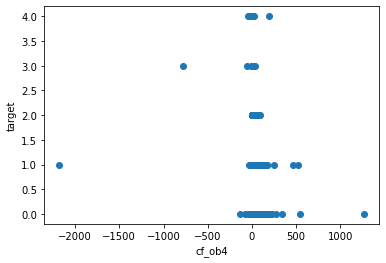

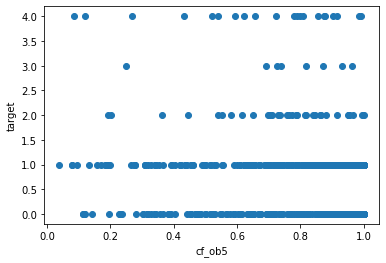

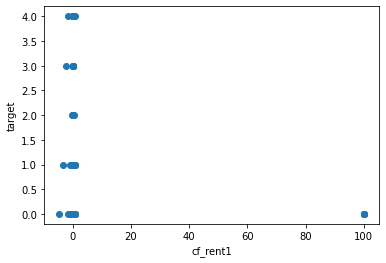

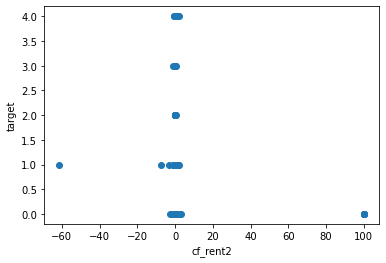

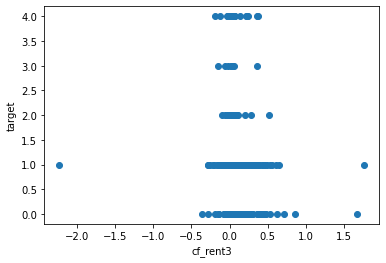

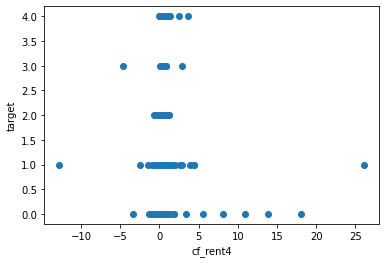

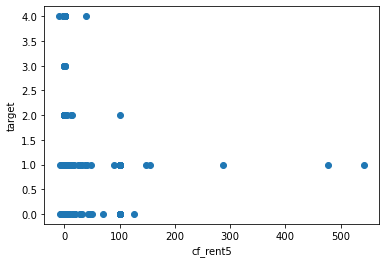

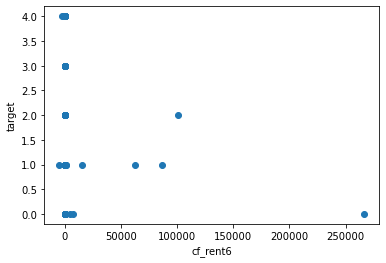

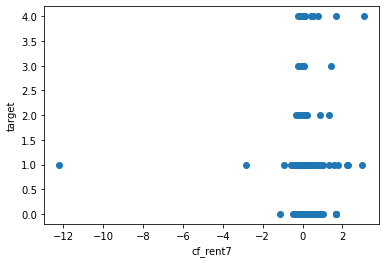

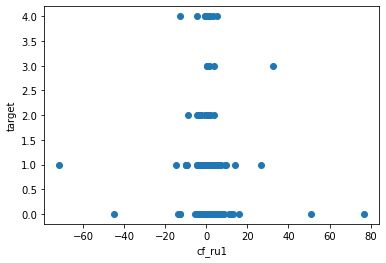

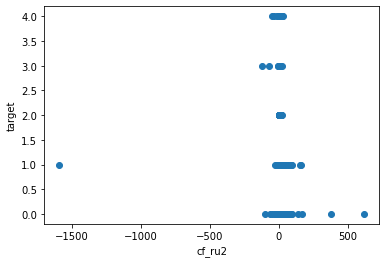

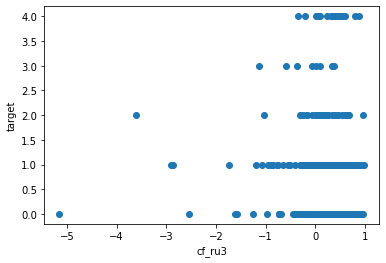

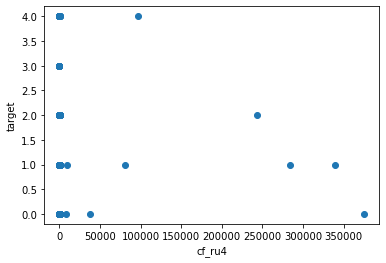

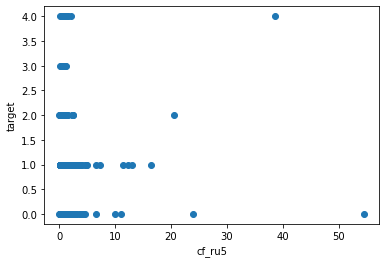

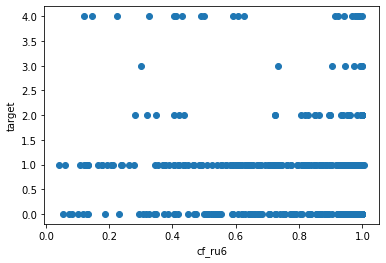

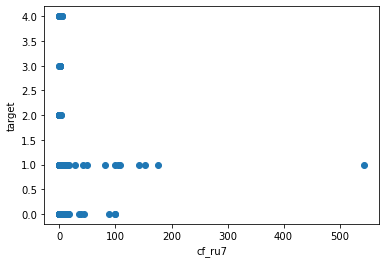

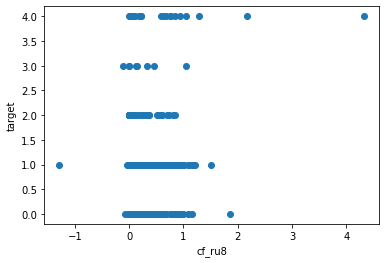

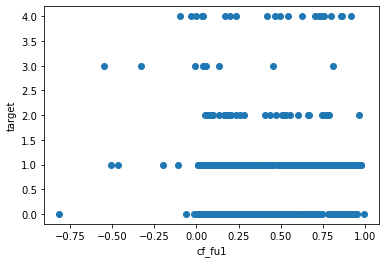

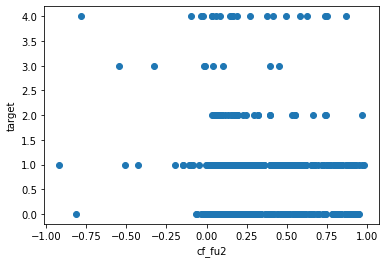

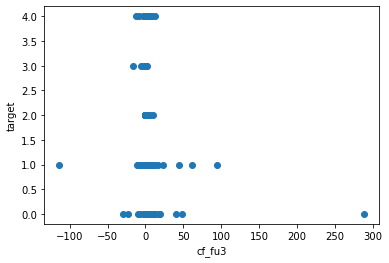

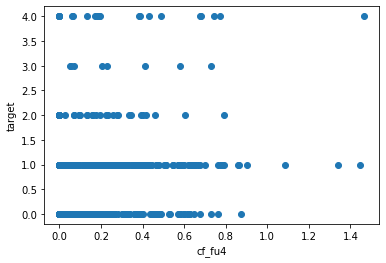

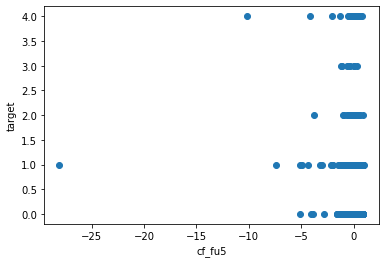

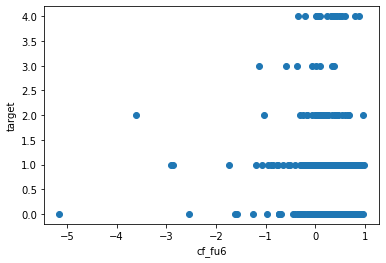

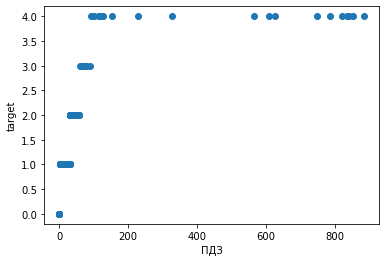

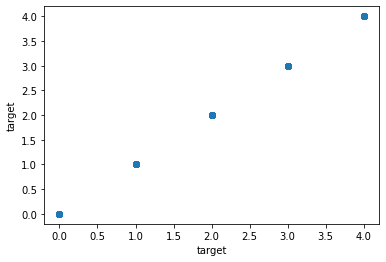

In [7]:
for i in data19.columns:
    plt.scatter(x = data19[i],y = data19['target'])
    plt.xlabel(i)
    plt.ylabel('target')
    plt.show()

**Небольшая связь прослеживается между таргетом и коэффициентами ликвидности: чем больше коэффициенты ликвидности, тем меньше значения таргета**